<a href="https://colab.research.google.com/github/Sakib3602/ML/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  K-Nearest Neighbour (KNN)

**Dataset:** Breast Cancer Wisconsin (Diagnostic)  
**Type:** Binary classification, fully tabular, numeric features only

### What you will practice
- Proper KNN training and prediction workflow
- Using pipelines with feature scaling
- Model evaluation using classification metrics
- Choosing the value of K
- Comparing distance metrics and voting weights

✅ This is a **practice notebook**: fill in the TODOs


In [2]:
#Importing Necessary Libraries [Done for you]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(42)


## 1) Load the Dataset (Tabular)

Breast Cancer dataset:
- 30 numeric features
- Binary target: malignant vs benign
- Very common in real ML pipelines

### Task
Load the dataset and inspect:
- Shape of X
- Target labels


In [3]:
# TODO 1: Load the dataset
data = load_breast_cancer()

# TODO 2: Set X and y
X = data.data
y = data.target

# TODO 3: Print:
# - X shape
# - unique class labels
# - class names

# YOUR CODE HERE
print(X.shape)
print(np.unique(y))
print(data.target_names)


(569, 30)
[0 1]
['malignant' 'benign']


## 2) Convert to DataFrame (Optional but Recommended)

Working with DataFrames helps interpretation and debugging.


In [4]:
# TODO: Convert X to a pandas DataFrame with feature names
df =pd.DataFrame(X, columns=data.feature_names)
df



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3) Train-Test Split

### Task
Split the dataset:
- test_size = 0.25
- random_state = 42
- stratify = y


In [5]:
# TODO: Create X_train, X_test, y_train, y_test using train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 4) Baseline KNN Model (With Scaling)

KNN relies on distance, so scaling is mandatory.

### Task
- Build a pipeline: StandardScaler → KNN
- Start with K = 5
- Fit the model
- Predict on test data
- Compute accuracy


In [6]:

model = Pipeline([
  ("scaler", StandardScaler()),
  ("knn", KNeighborsClassifier(n_neighbors=5))
])
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print(acc)


0.958041958041958


## 5) Model Evaluation

### Task
Evaluate your model using:
- Confusion matrix
- Classification report

Think:
- Which class is harder to predict?
- Is false negative more dangerous here?


In [7]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[51  3]
 [ 3 86]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



## 6) Optimization: Choosing the Best K

### Task
Try K values from 1 to 30.

Steps:
1. Loop over K
2. Train a pipeline for each K
3. Store accuracy
4. Plot accuracy vs K
5. Print best K and accuracy


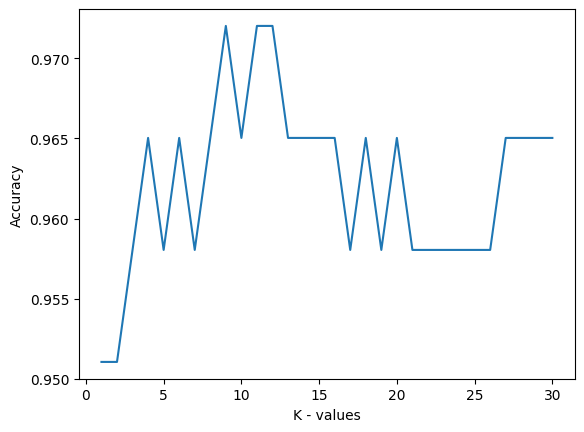

In [8]:

K_values = range(1,31)
accs = []
for k in K_values:
  model_k = Pipeline([
      ("scaler", StandardScaler()),
      ("knn", KNeighborsClassifier(n_neighbors=k))
  ])
  model_k.fit(X_train, y_train)
  pred_k = model_k.predict(X_test)
  accs.append(accuracy_score(y_test, pred_k))

plt.plot(K_values, accs)
plt.xlabel("K - values")
plt.ylabel("Accuracy")
plt.show()


## 7) Try Different Distance Metrics and Weights

### Task
Using your best K:
Compare the following settings:
1. Euclidean distance (p=2), uniform weights
2. Manhattan distance (p=1), uniform weights
3. Euclidean distance (p=2), distance weights

Store results in a DataFrame.


In [17]:
# TODO: Compare different KNN settings
# Hints:
best_k = 13
settings = [
  ("Euclidean uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="uniform")),
  ("Manhattan uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=1, weights="uniform")),
  ("Euclidean distance-weighted", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="distance"))
]



k_val = range(1,31)
acc = []

for name, m in settings:
  model_p = Pipeline([
      ("scaler", StandardScaler()),
      ("knn", m)
  ])
  model_p.fit(X_train, y_train)
  pred_p = model_p.predict(X_test)
  acc.append(
      {
      "Model" : name,
      "k" : best_k,
      "accuracy" : accuracy_score(y_test, pred_p)
      }
  )

pd.DataFrame(acc)








,Model,k,accuracy
0,Euclidean uniform,13,0.965035
1,Manhattan uniform,13,0.972028
2,Euclidean distance-weighted,13,0.965035
